In [1]:
# standard modules
import importlib

# PyTorch modules
import torch

# import data + model modules
from ukbb_package import ukbb_data
from ukbb_package import ukbb_ica_models
# in case of changes 
importlib.reload(ukbb_data)
importlib.reload(ukbb_ica_models)

# import custom functions
from ukbb_package import utils
# in case of changes
importlib.reload(utils)

# check: is GPU available?
torch.cuda.is_available()

True

In [2]:
# prepare data paths
ukbb_dir = '/ritter/share/data/UKBB/ukb_data/'

# define logging path
path = '../tracking/ICA25/ModelDepth1DCNN/'

In [3]:
utils.make_reproducible()

In [4]:
! gpustat

cuda02                      Thu Jun 29 13:41:57 2023  470.182.03
[0] NVIDIA GeForce RTX 3090 | 29'C,   0 % | 15244 / 24268 MB | tomasz(8261M) tomasz(6975M) gdm(4M)
[1] NVIDIA GeForce RTX 3090 | 34'C,   0 % |  1805 / 24268 MB | laurar(1797M) gdm(4M)
[2] NVIDIA GeForce RTX 3090 | 53'C,  47 % | 18207 / 24268 MB | manuel(18199M) gdm(4M)
[3] NVIDIA GeForce RTX 3090 | 28'C,   0 % |     8 / 24268 MB | gdm(4M)


# Testing different model depths for the ICA25 simple 1D CNN

It is tempting to change both the model depth and the channel dimensions in one step, seeing as different depths scale up their dimensionalities to a different degree based on the model architecture. However, I try to disentangle the two parameters a bit and will only focus on model depth here.

In [5]:
def train_modeldepth(log_path, data_path, model_depth, device):
    """
    Fuction for using the same model and training set-up for testing
    different model depths.
    Outputs a trained model.
    Input:
        log_path: path to where logs, checkpoints and data info should be saved
        data_path: path to location where data is saved (expectations see utils.DataModule)
        model depth: number of convolutional layers the model is supposed to have, as int
        device: which GPU to run on
    Output:
        trainer: trained model
    """
    # initialise model
    variable_CNN = ukbb_ica_models.variable1DCNN(depth=model_depth)

    # initialise logger
    logger = utils.logger_init(save_dir=path+str(model_depth)+'/')

    # set callbacks
    early_stopping = utils.earlystopping_init()

    checkpoint = utils.checkpoint_init(save_dir=path+str(model_depth)+'/')

    # initialise trainer
    trainer = utils.trainer_init(device=device,
                                logger=logger,
                                callbacks=[early_stopping, checkpoint])
    
    # initialise DataModule
    datamodule = ukbb_data.UKBBDataModule(data_path)

    # train model
    trainer.fit(variable_CNN, datamodule=datamodule)
    print('Training complete.')

    # save info on which data was used + what the train/val/test split was
    utils.save_data_info(path=path+str(model_depth)+'/', datamodule=datamodule)
    
    return trainer, datamodule

def test_modeldepth(trainer, datamodule, model_depth):
    """
    Fuction for using the same model and testing set-up for testing
    different model depths.
    Outputs test score and a plot visualising the training progression.
    Input:
        trainer: the trained model
        datamodule: Pytorch Lightning DataModule instance (same for all trials)
        model depth: number of convolutional layers the model is supposed to have, as int
    """
    print(f'\nTesting model with kernel size {model_depth}...')
    
    # test model
    trainer.test(ckpt_path='best', datamodule=datamodule)
    
    # visualise training
    print(f'\nVisualise training of model with kernel size {model_depth}')    
    metrics = utils.get_current_metrics(trainer, show=True)
    utils.plot_training(data=metrics, title=f'Training visualisation of the ICA25 1D-CNN with {model_depth} convolutional layers')

## Shallower than baseline model (depth = 4)

### model depth = 2

In [6]:
depth_2, depth_2_data = train_modeldepth(path, ukbb_dir, 2, 1)

/home/laurar/anaconda3/envs/cuda02/lib/python3.10/site-packages/pytorch_lightning/utilities/parsing.py:197: UserWarning: Attribute 'activation' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['activation'])`.
  rank_zero_warn(
/home/laurar/anaconda3/envs/cuda02/lib/python3.10/site-packages/pytorch_lightning/utilities/parsing.py:197: UserWarning: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
  rank_zero_warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision f

Sanity Checking: 0it [00:00, ?it/s]

/home/laurar/anaconda3/envs/cuda02/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 40 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/home/laurar/anaconda3/envs/cuda02/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 40 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Training complete.


You are using a CUDA device ('NVIDIA GeForce RTX 3090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision



Testing model with kernel size 2...


Restoring states from the checkpoint path at /home/laurar/IM/tracking/ICA25/ModelDepth1DCNN/2/Checkpoint/models-epoch=46-val_loss=43.62.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
Loaded model weights from the checkpoint at /home/laurar/IM/tracking/ICA25/ModelDepth1DCNN/2/Checkpoint/models-epoch=46-val_loss=43.62.ckpt
/home/laurar/anaconda3/envs/cuda02/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, test_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 40 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_loss           35.185386657714844
        test_mae             4.871898651123047
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Visualise training of model with kernel size 2


,step,train_loss,val_loss,val_mae,test_loss,test_mae
epoch,,,,,,
0,9,306.748260,NaN,NaN,NaN,NaN
0,19,71.874466,NaN,NaN,NaN,NaN
0,29,102.469093,NaN,NaN,NaN,NaN
0,36,NaN,111.292053,8.542652,NaN,NaN
1,39,66.684998,NaN,NaN,NaN,NaN


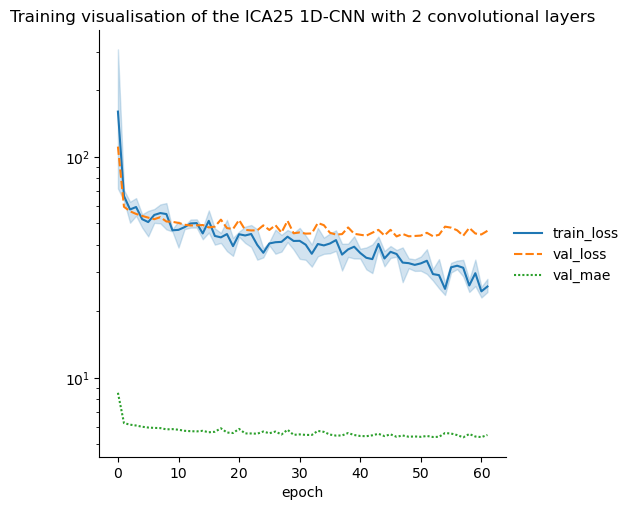

In [7]:
test_modeldepth(depth_2, depth_2_data, 2)

In [ ]:
- schlechter

### model depth = 3

In [8]:
depth_3, depth_3_data = train_modeldepth(path, ukbb_dir, 3, 1)

/home/laurar/anaconda3/envs/cuda02/lib/python3.10/site-packages/pytorch_lightning/utilities/parsing.py:197: UserWarning: Attribute 'activation' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['activation'])`.
  rank_zero_warn(
/home/laurar/anaconda3/envs/cuda02/lib/python3.10/site-packages/pytorch_lightning/utilities/parsing.py:197: UserWarning: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
  rank_zero_warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision f

Sanity Checking: 0it [00:00, ?it/s]

/home/laurar/anaconda3/envs/cuda02/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 40 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/home/laurar/anaconda3/envs/cuda02/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 40 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Training complete.


You are using a CUDA device ('NVIDIA GeForce RTX 3090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision



Testing model with kernel size 3...


Restoring states from the checkpoint path at /home/laurar/IM/tracking/ICA25/ModelDepth1DCNN/3/Checkpoint/models-epoch=41-val_loss=41.70.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
Loaded model weights from the checkpoint at /home/laurar/IM/tracking/ICA25/ModelDepth1DCNN/3/Checkpoint/models-epoch=41-val_loss=41.70.ckpt
/home/laurar/anaconda3/envs/cuda02/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, test_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 40 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_loss            35.10093307495117
        test_mae             4.852231025695801
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Visualise training of model with kernel size 3


,step,train_loss,val_loss,val_mae,test_loss,test_mae
epoch,,,,,,
0,9,338.973511,NaN,NaN,NaN,NaN
0,19,384.131683,NaN,NaN,NaN,NaN
0,29,99.062576,NaN,NaN,NaN,NaN
0,36,NaN,84.406921,7.655385,NaN,NaN
1,39,56.397041,NaN,NaN,NaN,NaN


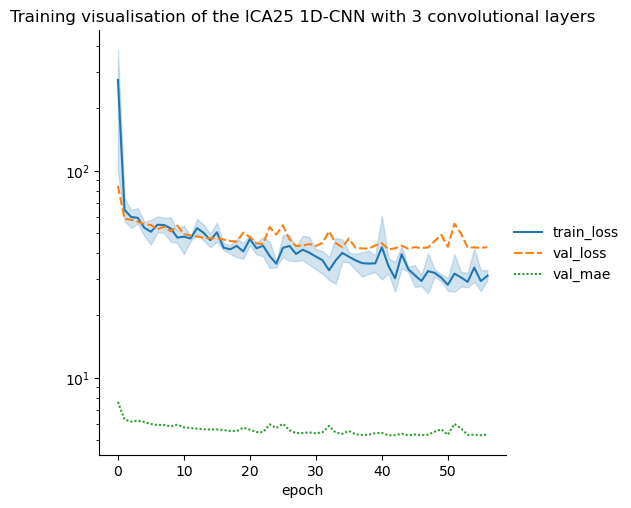

In [9]:
test_modeldepth(depth_3, depth_2_data, 3)

- bisschen besser als depth=2, aber

## Deeper than baseline model (depth = 4)

### model depth = 5

In [10]:
depth_5, depth_5_data = train_modeldepth(path, ukbb_dir, 5, 1)

/home/laurar/anaconda3/envs/cuda02/lib/python3.10/site-packages/pytorch_lightning/utilities/parsing.py:197: UserWarning: Attribute 'activation' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['activation'])`.
  rank_zero_warn(
/home/laurar/anaconda3/envs/cuda02/lib/python3.10/site-packages/pytorch_lightning/utilities/parsing.py:197: UserWarning: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
  rank_zero_warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision f

Sanity Checking: 0it [00:00, ?it/s]

/home/laurar/anaconda3/envs/cuda02/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 40 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/home/laurar/anaconda3/envs/cuda02/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 40 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Training complete.


You are using a CUDA device ('NVIDIA GeForce RTX 3090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision



Testing model with kernel size 5...


Restoring states from the checkpoint path at /home/laurar/IM/tracking/ICA25/ModelDepth1DCNN/5/Checkpoint/models-epoch=41-val_loss=42.12.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
Loaded model weights from the checkpoint at /home/laurar/IM/tracking/ICA25/ModelDepth1DCNN/5/Checkpoint/models-epoch=41-val_loss=42.12.ckpt
/home/laurar/anaconda3/envs/cuda02/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, test_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 40 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_loss            32.35680389404297
        test_mae             4.52288293838501
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Visualise training of model with kernel size 5


,step,train_loss,val_loss,val_mae,test_loss,test_mae
epoch,,,,,,
0,9,469.139984,NaN,NaN,NaN,NaN
0,19,411.012115,NaN,NaN,NaN,NaN
0,29,157.403091,NaN,NaN,NaN,NaN
0,36,NaN,146.715485,10.177119,NaN,NaN
1,39,67.342216,NaN,NaN,NaN,NaN


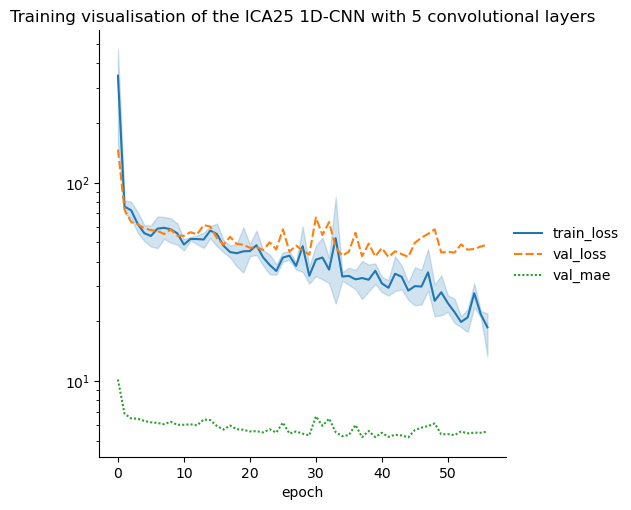

In [11]:
test_modeldepth(depth_5, depth_5_data, 5)

### model depth = 6

In [12]:
depth_6, depth_6_data = train_modeldepth(path, ukbb_dir, 6, 1)

/home/laurar/anaconda3/envs/cuda02/lib/python3.10/site-packages/pytorch_lightning/utilities/parsing.py:197: UserWarning: Attribute 'activation' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['activation'])`.
  rank_zero_warn(
/home/laurar/anaconda3/envs/cuda02/lib/python3.10/site-packages/pytorch_lightning/utilities/parsing.py:197: UserWarning: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
  rank_zero_warn(


RuntimeError: Given input size: (1024x1x4). Calculated output size: (1024x1x0). Output size is too small

In [ ]:
test_modeldepth(depth_6, depth_6_data, 6)

### model depth = 8

In [ ]:
depth_8, depth_8_data = train_modeldepth(path, ukbb_dir, 8, 1)

In [ ]:
test_modeldepth(depth_8, depth_8_data, 8)

Already with depth = 6 we encounter a problem: Due to the reduction through the kernel size and the pooling, there are not enough time points left for running through further layers.

So the question is: what are the possible architectures for the hyperparameter sweep with our limit of 490 initial time points?